In [48]:
import os
import csv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Input

In [49]:
#Use GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.config.list_physical_devices('GPU')
tf.device('/gpu:0')

train_dir = 'PTSD_Recognition/train'
csv_file = 'testset_CSV.csv'
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),seed=123, batch_size=43)
classes = list(train_ds.class_indices.keys())

Num GPUs Available:  1
Found 14405 images belonging to 43 classes.


In [50]:
import os
import csv
import matplotlib.pyplot as plt
from PIL import Image
image_folder = 'PTSD_Recognition/test'


csv_file = 'testset_CSV.csv'


output_folder = 'Persian Traffic Sign Dataset (PTSD)/Output'

In [58]:
data = []
with open(csv_file, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        filename, label = row[0], row[1]
        filename=str(filename).lower()
        image_path = os.path.join(image_folder, 'PTSD_' + filename)
        #print(image_path)
        #image_path=str((image_path).lower())
        #print(image_path)
        data.append(({'image_path': image_path, 'label': label}))
my_set =set()
for item in data[1:]:
    image_path = item['image_path']
    label = item['label']
    my_set.add(label)
    
    label_folder = os.path.join(output_folder, label)
    os.makedirs(label_folder, exist_ok=True)

    
    image = Image.open(image_path)

    
    new_filename = f"{label}_{os.path.basename(image_path)}"
    output_path = os.path.join(label_folder, new_filename)

    
    image.save(output_path)

    
    #print(f"Saved: {output_path}, Label: {label}")
test_dir = 'Persian Traffic Sign Dataset (PTSD)/Output'
generator_test = ImageDataGenerator()
test_ds = generator_test.flow_from_directory(test_dir,target_size=(224, 224),seed=123, batch_size=43)
classes_test = list(test_ds.class_indices.keys())
print(len(my_set))
sorted_list = sorted(my_set)

# Printing elements line by line
for i,item in enumerate(sorted_list):
    print(i,item)

Found 2422 images belonging to 45 classes.
43
0 Compulsory Keep BothSide
1 Compulsory Keep Left
2 Compulsory Keep Right
3 Cycle crossing
4 Danger
5 Give Way
6 Hump
7 Left Bend
8 Left Margin
9 Left Turn Prohibited
10 Maximum Speed 30
11 Maximum Speed 40
12 Maximum Speed 50
13 Maximum Speed 60
14 Maximum Speed 70
15 Maximum Speed 80
16 Maximum Speed 90
17 MotorCycle Prohibited
18 NO Stopping
19 NO Waiting
20 No Entry
21 No Horn
22 One way Traffic
23 Park
24 Park Forbidden
25 Pedestrain
26 Pedestrian crossing
27 Right Bend
28 Right Margin
29 Right Turn Prohibited
30 Road Work
31 Roundabouts
32 STOP
33 School
34 School Crossing
35 Side Road Right
36 Slow
37 Speed Camera
38 Truck Prohibited
39 Two Way Traffic
40 U-Turn
41 U-Turn Allowed
42 U-turn Prohibited


In [30]:
import pandas as pd 
import numpy as np 
from glob import glob 
labelfile = pd.read_csv('testset_CSV.csv', delimiter=',')
labelfile.head()

,file,species
0,00001.jpg,Park
1,00002.jpg,U-Turn Allowed
2,00003.jpg,Compulsory Keep BothSide
3,00004.jpg,One way Traffic
4,00005.jpg,Left Margin


In [31]:
labelfile.tail()

,file,species
2416,02417.jpg,School
2417,02418.jpg,NO Waiting
2418,02419.jpg,NO Waiting
2419,02420.jpg,Slow
2420,02421.jpg,U-turn Prohibited


In [32]:
train_dss = generator.flow_from_directory(train_dir,target_size=(224, 224),seed=123, batch_size=43,subset='training')
train_dss_classes = list(train_ds.class_indices.keys())

Found 14405 images belonging to 43 classes.


In [33]:
class_indices = train_dss.class_indices
class_names = list(class_indices.keys())
print(class_names)

['0_Compulsory Keep BothSide', '10_Maximum Speed 30', '11_Maximum Speed 40', '12_Maximum Speed 50', '13_Maximum Speed 60', '14_Maximum Speed 70', '15_Maximum Speed 80', '16_Maximum Speed 90', '17_MotorCycle Prohibited', '18_No Entry', '19_No Horn', '1_Compulsory Keep Left', '20_NO Stopping', '21_NO Waiting', '22_One way Traffic', '23_Park', '24_Park Forbidden', '25_Pedestrain', '26_Pedestrian crossing', '27_Right Bend', '28_Right Margin', '29_Right Turn Prohibited', '2_Compulsory Keep Right', '30_Road Work', '31_Roundabouts', '32_School', '33_School Crossing', '34_Side Road Right', '35_Slow', '36_Speed Camera', '37_STOP', '38_Truck Prohibited', '39_Two Way Traffic', '3_Cycle crossing', '40_U-Turn', '41_U-Turn Allowed', '42_U-turn Prohibited', '4_Danger', '5_Give Way', '6_Hump', '7_Left Bend', '8_Left Margin', '9_Left Turn Prohibited']


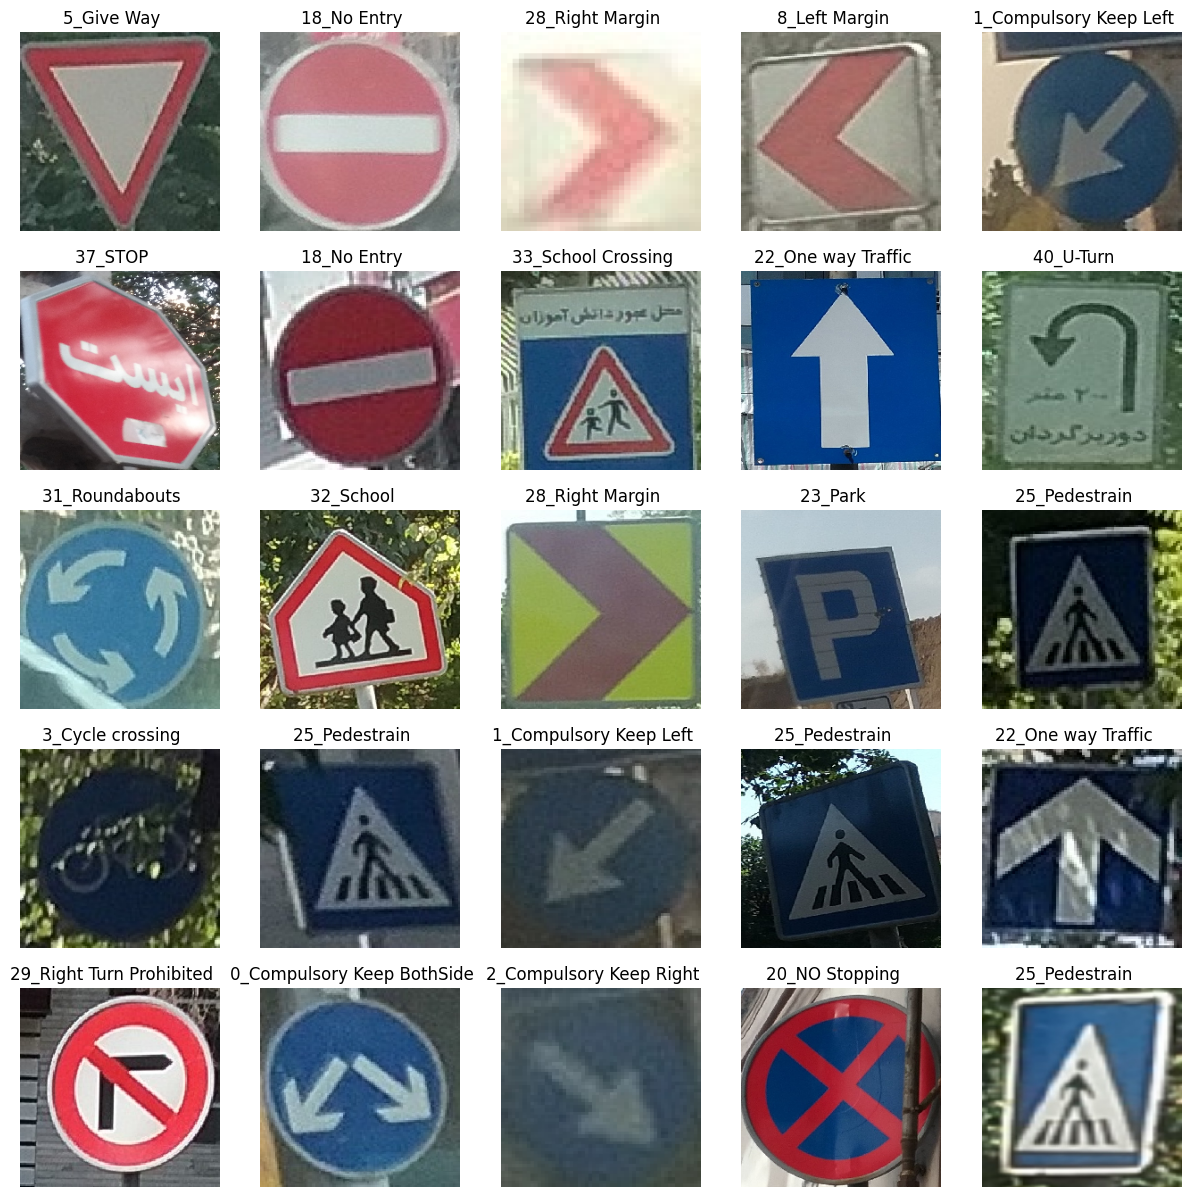

In [34]:
class_names = list(train_dss_classes)
import matplotlib.pyplot as plt
import numpy as np


num_images_to_display = 25


plt.figure(figsize=(15, 15)) 


images, labels = next(train_dss)


for i in range(num_images_to_display): 
    ax = plt.subplot(5, 5, i + 1) 
    plt.imshow(images[i].astype("uint8"))
    
    label_index = np.argmax(labels[i])

    plt.title(str(class_names[label_index])+'   ')
    plt.axis("off")



plt.show()

In [35]:
data_augmentation = tf.keras.Sequential( 
    [ 
        tf.keras.layers.experimental.preprocessing.RandomFlip( 
            "horizontal", input_shape=(224, 224, 3)), 
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1), 
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2), 
        tf.keras.layers.experimental.preprocessing.RandomFlip( 
            mode="horizontal_and_vertical") 
    ] 
) 

In [41]:
import matplotlib.image as mpimg 
import os 
  
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.models import Sequential 
from keras import layers 
from tensorflow import keras 
from tensorflow.keras.layers.experimental.preprocessing import Rescaling 
from sklearn.model_selection import train_test_split 
  
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from glob import glob 
import cv2 
print(len(train_dss_classes))

43


In [42]:
model = Sequential() 
#model.add(data_augmentation) 
#model.add(Rescaling(1./255))
model.add(Conv2D(43, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(256, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 
model.add(Flatten()) 
model.add(Dense(64, activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(len(classes), activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 43)      1204      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 128)     49664     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 128)     0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)      

In [44]:
keras.utils.plot_model( 
    model, 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_activations=True
) 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [47]:
'''model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['accuracy']) '''
model.compile(loss = 'categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
#mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)] 
history = model.fit(train_ds, 
                 validation_data=test_ds, 
                 epochs=30, 
                 #callbacks=mycallbacks,
                 batch_size=43) 

Epoch 1/30
335/335 [==============================] - ETA: 0s - loss: 0.5300 - accuracy: 0.8532

InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/softmax_cross_entropy_with_logits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_179402/1429934204.py", line 8, in <module>

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1856, in fit

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2296, in evaluate

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 4108, in run_step

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2066, in test_function

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2049, in step_function

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 2037, in run_step

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1919, in test_step

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/losses.py", line 143, in __call__

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/losses.py", line 270, in call

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/losses.py", line 2221, in categorical_crossentropy

  File "/home/soheilsaya/.local/lib/python3.10/site-packages/keras/src/backend.py", line 5579, in categorical_crossentropy

logits and labels must be broadcastable: logits_size=[43,43] labels_size=[43,45]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_10495]

In [2]:
import os
import csv
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg19 import preprocess_input
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.layers import Input

In [5]:
train_dir = 'PTSD_Recognition/train'
csv_file = 'testset_CSV.csv'
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),seed=123, batch_size=43)
classes = list(train_ds.class_indices.keys())


Found 14405 images belonging to 43 classes.


In [9]:
classes=['0_Compulsory Keep BothSide',
 '10_Maximum Speed 30',
 '11_Maximum Speed 40',
 '12_Maximum Speed 50',
 '13_Maximum Speed 60',
 '14_Maximum Speed 70',
 '15_Maximum Speed 80',
 '16_Maximum Speed 90',
 '17_MotorCycle Prohibited',
 '18_No Entry',
 '19_No Horn',
 '1_Compulsory Keep Left',
 '20_NO Stopping',
 '21_NO Waiting',
 '22_One way Traffic',
 '23_Park',
 '24_Park Forbidden',
 '25_Pedestrain',
 '26_Pedestrian crossing',
 '27_Right Bend',
 '28_Right Margin',
 '29_Right Turn Prohibited',
 '2_Compulsory Keep Right',
 '30_Road Work',
 '31_Roundabouts',
 '32_School',
 '33_School Crossing',
 '34_Side Road Right',
 '35_Slow',
 '36_Speed Camera',
 '37_STOP',
 '38_Truck Prohibited',
 '39_Two Way Traffic',
 '3_Cycle crossing',
 '40_U-Turn',
 '41_U-Turn Allowed',
 '42_U-turn Prohibited',
 '4_Danger',
 '5_Give Way',
 '6_Hump',
 '7_Left Bend',
 '8_Left Margin',
 '9_Left Turn Prohibited']

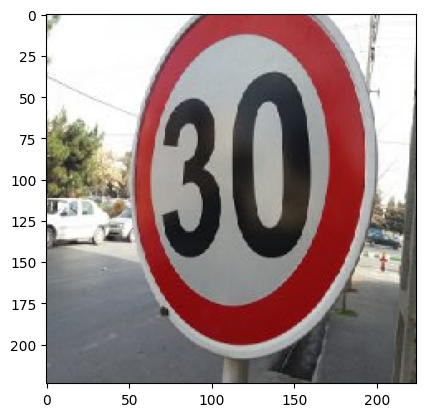

1/1 [==============================] - 0s 67ms/step
Actual: test.jpg
Predicted: 10_Maximum Speed 30


In [10]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
model=load_model('Persian_Traffic_Sign_V1-2.h5')
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("\\")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])
predict_image('test.jpg')